In [1]:
library(factoextra)
library(cluster)
library(NbClust)


Loading required package: ggplot2
Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


# Estudio del aeropuerto

In [4]:
dfAeropuerto <- read.csv('./cluster_sitios/aeropuerto.csv', header = TRUE, sep = ',')


In [5]:
dfAeropuerto.scaled <- dfAeropuerto
dfAeropuerto.scaled[,-(1)]<- as.data.frame(scale(dfAeropuerto[,-(1)]))
(dfAeropuerto.scaled)

mac_usr,avg_monthly_conections,X.0.00.3.59....,X.4.00.7.59....,X.8.00.11.59....,X.12.00.15.59....,X.16.00.19.59....,X.20.00.23.59....,diversidad,cant_conexiones
00:14:D1:5C:98:CD,122.65030,0.29462860,-0.183320439,0.149942711,0.212915388,-0.28687616,0.00724795,-0.1529013,34.177339
D0:92:9E:0F:27:14,85.73321,0.55835270,-0.103474224,-0.090491304,0.102082850,-0.32561392,0.16270187,-0.1529013,71.972601
2C:D0:5A:72:6D:AA,78.48164,0.46686719,-0.065820931,0.004699089,0.137365290,-0.36362237,0.09172935,-0.1529013,102.043284
00:0C:E7:80:B9:97,74.85586,0.28696733,-0.067779082,-0.054230467,0.150687480,-0.28816198,0.16995862,-0.1529013,79.789139
24:E3:14:85:4D:79,68.26352,0.31992680,-0.243900207,0.146096471,0.115626349,-0.14080281,-0.03232279,-0.1135506,94.502623
3C:D0:F8:61:11:09,57.71578,0.40338943,0.230589969,-0.152610752,-0.141592480,-0.53736984,0.46796423,-0.1529013,16.061362
90:94:E4:0A:4B:E6,54.74923,0.57387256,-0.290029176,-0.101047316,0.172904744,-0.25204576,0.21051146,-0.1529013,93.307152
D8:EB:97:23:BE:30,53.43076,0.37552114,-0.071289425,0.058861881,0.130020165,-0.32790424,0.06038773,-0.1529013,85.030818
1C:B0:94:75:B9:A9,52.11229,0.42005234,0.023862367,-0.183204138,0.084991357,-0.20253364,0.07283219,-0.1529013,72.616316
D8:EB:97:23:BE:4B,38.59800,0.09549561,0.118821153,0.135327000,0.023264936,-0.34147113,0.07076780,-0.1529013,16.521158


In [6]:
set.seed(55)
kmodel <- kmeans(dfAeropuerto.scaled[,-(1)], centers=5, nstart = 5)
dfAeropuerto.scaled$cluster = kmodel$cluster
dfAeropuerto$cluster = kmodel$cluster
# kmodel

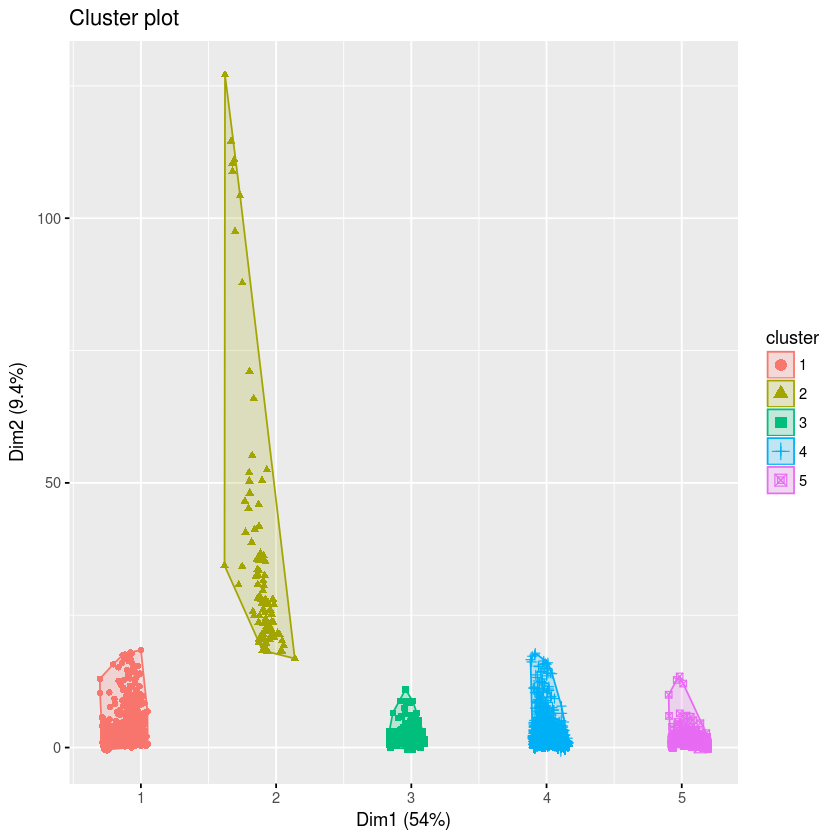

In [7]:
fviz_cluster(kmodel, data = dfAeropuerto.scaled[,-(1)], geom = "point",
             stand = FALSE)

In [87]:
write.csv(dfAeropuerto,"Airportclustering_inR.csv")

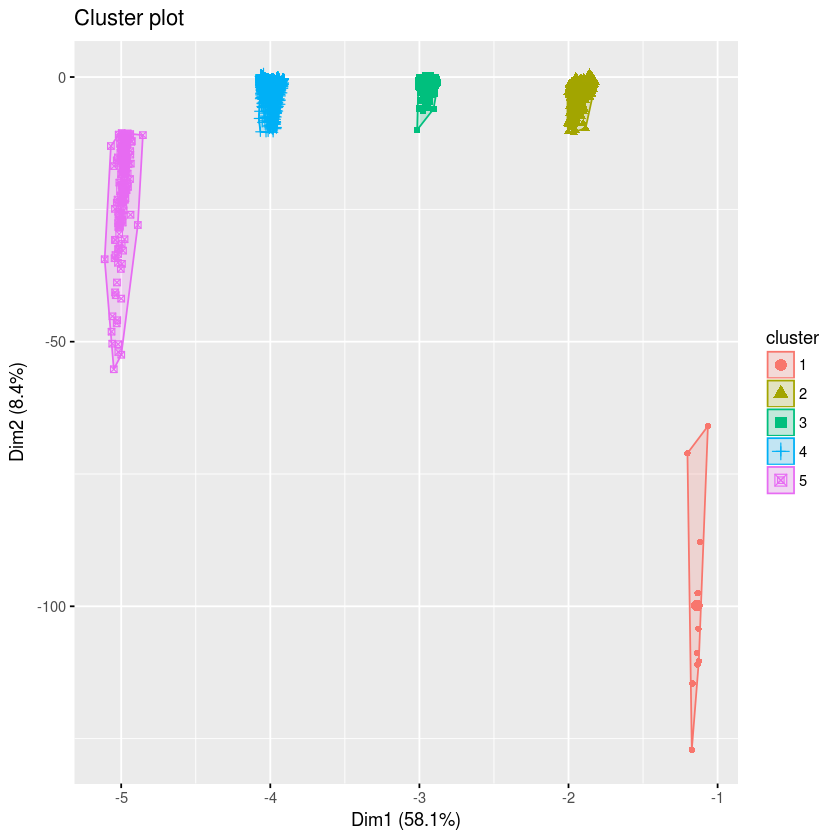

In [57]:
# set.seed(55)
# kmodel <- kmeans(dfAeropuerto.scaled[,-c(1)], centers=5)
# dfAeropuerto.scaled$cluster = kmodel$cluster
# fviz_cluster(kmodel, data = dfAeropuerto.scaled[,-c(1)], geom = "point",
#              stand = FALSE)

# Estudio Centro de convenciones

K-means clustering with 5 clusters of sizes 4702, 10012, 8783, 7965, 3717

Cluster means:
  X.0.00.3.59.... X.4.00.7.59.... X.8.00.11.59.... X.12.00.15.59....
1    -0.002160902    -0.099798861      -0.57454503        -0.7035318
2    -0.007175322    -0.117961649      -0.52317667        -0.4870172
3     0.016532984     0.296984888       1.33507628        -0.3773780
4    -0.029089737    -0.122703802      -0.46370589         1.6129109
5     0.045329686     0.005166474      -0.02502072        -0.3627390
  X.16.00.19.59.... X.20.00.23.59.... diversidad cant_conexiones
1        -0.6794309         2.1213884 -0.3609528     -0.10135603
2         1.2877491        -0.3079570 -0.3617676     -0.04501781
3        -0.5857150        -0.4377954 -0.3546355      0.16063430
4        -0.6458624        -0.4841240 -0.1452901     -0.07460201
5         0.1588294         0.2178376  2.5803650      0.02976817

Clustering vector:
    [1] 3 3 3 3 3 3 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
   [37

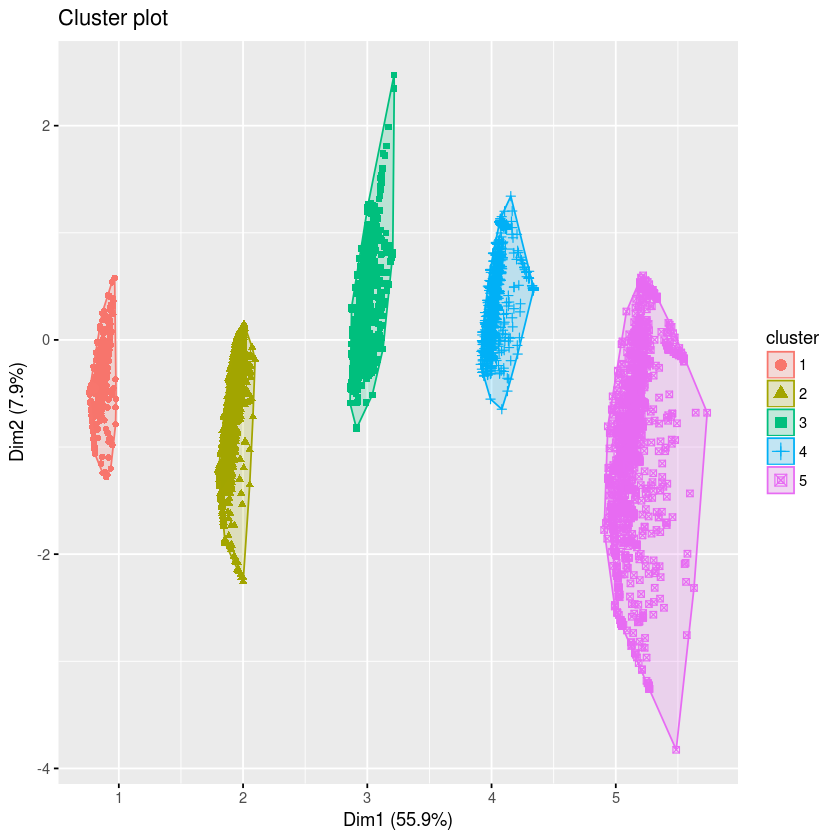

In [8]:
df <- read.csv('./cluster_sitios/centroConvenciones.csv', header = TRUE, sep = ',')
df.scaled <- df
df.scaled[,-(1)]<- as.data.frame(scale(df[,-(1)]))
set.seed(55)
kmodel <- kmeans(df.scaled[,-(1:2)], centers=5)
df.scaled$cluster = kmodel$cluster
fviz_cluster(kmodel, data = df.scaled[,-(1:2)], geom = "point", stand = FALSE)
kmodel

In [9]:
write.csv(df,"CentroConvencionesclustering_inR.csv")

# estudio city mall

K-means clustering with 4 clusters of sizes 9396, 3544, 9184, 11487

Cluster means:
  avg_monthly_conections X.0.00.3.59.... X.4.00.7.59.... X.8.00.11.59....
1            -0.12248496     0.010944274    -0.040145183       -0.2745246
2             0.69451434    -0.003719387    -0.005546622        0.1246499
3            -0.02977549    -0.001464699     0.092800098        0.6032172
4            -0.09027876    -0.006633507    -0.039646098       -0.2961846
  X.12.00.15.59.... X.16.00.19.59.... X.20.00.23.59....  diversidad
1         1.4910101        -0.8336259        -0.5348517 -0.09562732
2        -0.3530351         0.1730857         0.1128206  2.35350650
3        -0.6223087        -0.7020023         1.1504571 -0.35864274
4        -0.6131358         1.1897382        -0.5171209 -0.36115068
  cant_conexiones
1     -0.09879705
2      0.80619507
3     -0.07774922
4     -0.10575516

Clustering vector:
    [1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
   [37] 2 2 2 2 

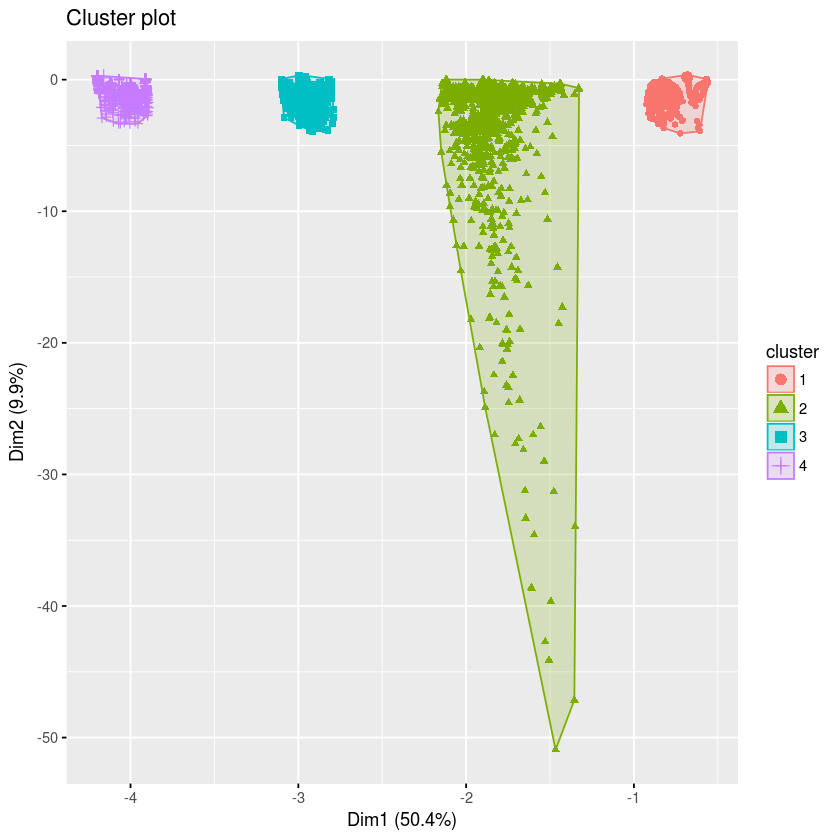

In [10]:
df <- read.csv('./cluster_sitios/cityMall.csv', header = TRUE, sep = ',')
df.scaled <- df
df.scaled[,-(1)]<- as.data.frame(scale(df[,-(1)]))
set.seed(55)
kmodel <- kmeans(df.scaled[,-(1)], centers=4)
df.scaled$cluster = kmodel$cluster
fviz_cluster(kmodel, data = df.scaled[,-(1)], geom = "point", stand = FALSE)
kmodel

In [12]:
write.csv(df,"CityMallclustering_inR.csv")

# Estudio mall del sur

K-means clustering with 3 clusters of sizes 7004, 14476, 13177

Cluster means:
  avg_monthly_conections X.0.00.3.59.... X.4.00.7.59.... X.8.00.11.59....
1            -0.13015899    -0.003797230     -0.02351941       -0.2417526
2             0.14685791    -0.006046113      0.03898377        0.3283608
3            -0.09215159     0.008660494     -0.03032550       -0.2322316
  X.12.00.15.59.... X.16.00.19.59.... X.20.00.23.59....  diversidad
1        -0.7279291        -0.8319956         1.8782475 -0.05363409
2         1.0008065        -0.6845416        -0.5032032  0.03784062
3        -0.7125491         1.1942568        -0.4455396 -0.01306273
  cant_conexiones
1     -0.09210405
2      0.11276253
3     -0.07492249

Clustering vector:
    [1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
   [37] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
   [73] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  [109] 2 2 2 2 2 2 2

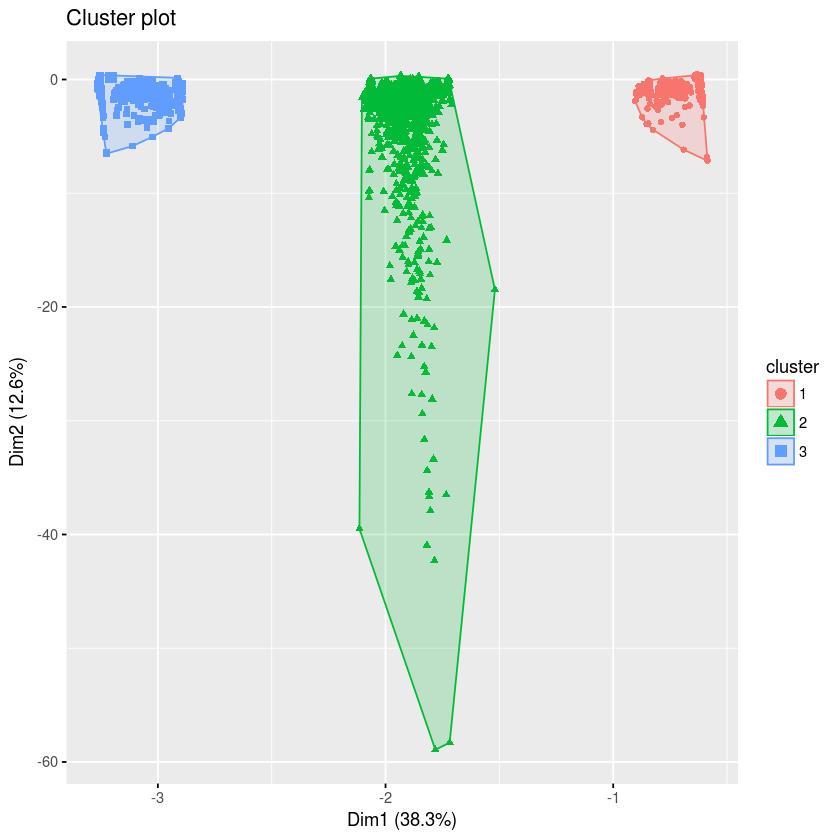

In [13]:
df <- read.csv('./cluster_sitios/mallSur.csv', header = TRUE, sep = ',')
df.scaled <- df
df.scaled[,-(1)]<- as.data.frame(scale(df[,-(1)]))
set.seed(55)
kmodel <- kmeans(df.scaled[,-(1)], centers=3)
df.scaled$cluster = kmodel$cluster
fviz_cluster(kmodel, data = df.scaled[,-(1)], geom = "point", stand = FALSE)
kmodel

In [14]:
write.csv(df,"MallSurclustering_inR.csv")